**Getting Text to Analyze:** Now, we are ready to analyze a bunch of texts at once. A group of texts is called a corpus. NLTK provides several corpora covering everything from novels hosted by Project Gutenberg to inaugural speeches by presidents of the United States.

In order to analyze texts in NLTK, we first need to import them. This requires nltk.download("book"), which is a pretty big download.




In [2]:
import nltk
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**Using a Concordance:** When we use a concordance, we can see each time a word is used, along with its immediate context. This can give us a peek into how a word is being used at the sentence level and what words are used with it.

 The personals corpus is called text8, so we are going to call .concordance() on it with the parameter "man".

In [4]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

Interestingly, the last three of those fourteen matches have to do with seeking an honest man, specifically:

1. SEEKING HONEST MAN
2. Seeks 35 - 45 , honest man with good SOH & similar interests
3. genuine , caring , honest and normal man for fship , poss rship

Let us check if there is a similar pattern with the word "woman".




In [5]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


The issue of honesty came up only once here.

Dipping into a corpus with a concordance will not give us the full picture, but it can still be interesting to analyze and check if anything stands out.

**Making a Dispersion Plot:** We can use a dispersion plot to see how much a particular word appears and where it appears. So far, we have looked for "man" and "woman", but it would be interesting to see how much those words are used compared to their synonyms.

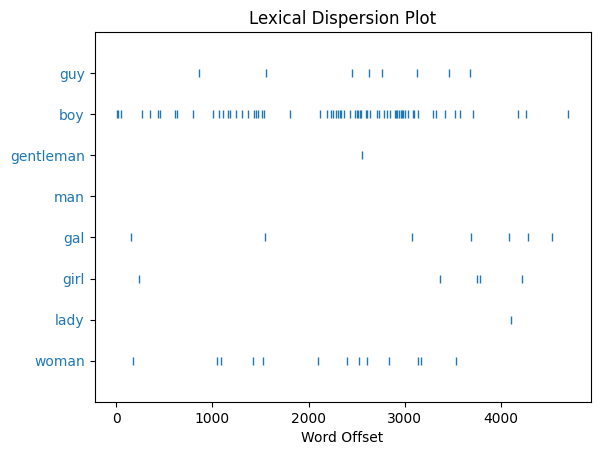

In [6]:
text8.dispersion_plot(
...     ["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"]
... )

Each vertical blue line represents one instance of a word. Each horizontal row of blue lines represents the corpus as a whole. This plot shows that:

1. "lady" was used a lot more than "woman" or "girl". There were no instances of "gal".
2. "man" and "guy" were used a similar number of times and were more common than "gentleman" or "boy".

We use a dispersion plot when we want to see where words show up in a text or corpus. If we are analyzing a single text, this can help us see which words show up near each other. If we are analyzing a corpus of texts that is organized chronologically, it can help us see which words were used more or less over a period of time.

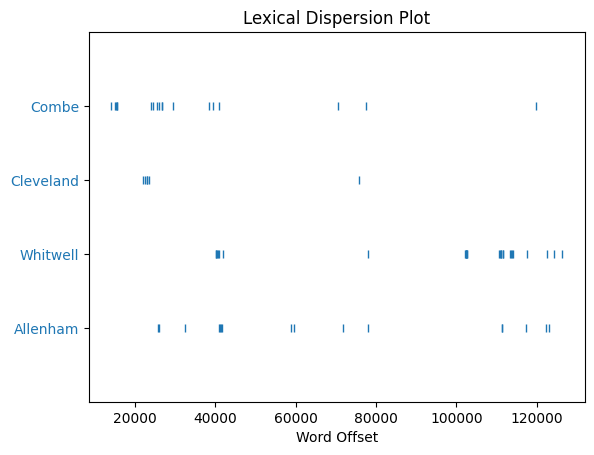

In [7]:
text2.dispersion_plot(["Allenham", "Whitwell", "Cleveland", "Combe"])

Apparently, Allenham is mentioned a lot in the first third of the novel and then doesn’t come up much again. Cleveland, on the other hand, barely comes up in the first two-thirds but shows up a fair bit in the last third. This distribution reflects changes in the relationship between Marianne and Willoughby:

1. Allenham is the home of Willoughby’s benefactress and comes up a lot when Marianne is first interested in him.
2. Cleveland is a home that Marianne stays at after she goes to see Willoughby in London and things go wrong.

Dispersion plots are just one type of visualization we can make for textual data. The next one we shall take a look at is frequency distributions.

In [8]:
from nltk import FreqDist

FreqDist is a subclass of collections.Counter. Here is how to create a frequency distribution of the entire corpus of personals ads.

In [9]:
frequency_distribution = FreqDist(text8)

In [10]:
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


Since 1108 samples and 4867 outcomes are a lot of information, let us narrow that down. Here is how to see the 20 most common words in the corpus.

In [11]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

In [14]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

We have a lot of stop words in our frequency distribution, but we can remove them just as we did earlier by creating a list of all of the words in text8 that are not stop words.

In [15]:
meaningful_words = [
...     word for word in text8 if word.casefold() not in stop_words
... ]

Now we have a list of all of the words in our corpus and these are not the stop words. Let us make a frequency distribution.

In [16]:
frequency_distribution = FreqDist(meaningful_words)

Let us look at the 20 most common words.

In [17]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('50', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18)]

We can turn this list into a graph.

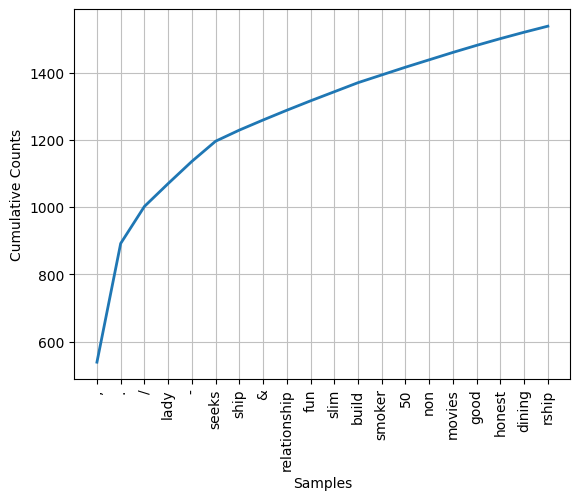

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [18]:
frequency_distribution.plot(20, cumulative=True)

Some of the most common words are:

'lady'

'seeks'

'ship'

'relationship'

'fun'

'slim'

'build'

'smoker'

'50'

'non'

'movies'

'good'

'honest'

'dinning'

'rship'

From what we have already learned about the people writing these personals ads, they did seem interested in honesty and used the word 'lady' a lot. In addition, 'slim' and 'build' both show up the same number of times. We saw slim and build used near each other when we were learning about concordances, so maybe those two words are commonly used together in this corpus. That brings us to collocations!

**Finding Collocations:** A collocation is a sequence of words that shows up often.

In [19]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


Let us first create a list of the lemmatized versions of all the words in text8.

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
lemmatizer = WordNetLemmatizer()

In [23]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8]

We need to make an NLTK text with this list.

In [24]:
new_text = nltk.Text(lemmatized_words)

This is how to see the collocations in our new_text.

In [25]:
new_text.collocations()

medium build; social drinker; non smoker; quiet night; long term;
would like; age open; easy going; financially secure; Would like; fun
time; similar interest; Age open; weekend away; well presented; never
married; single mum; permanent relationship; year old; slim build
